# Road Rage: Finding the Ideal Speed Limit

### Assumptions
* Drivers want to go up to 120 km/hr.
* The average car is 5 meters long.
* Drivers want at least a number of meters equal to their speed in meters/second between them and the next car.
* Drivers will accelerate 2 m/s<sup>2</sup> up to their desired speed as long as they have room to do so.
* If another car is too close, drivers will match that car's speed until they have room again.
* If a driver would hit another car by continuing, they stop.
* Drivers will randomly (10% chance each second) slow by 2 m/s.
* This section of road is one lane going one way.
* Assume that drivers enter the road at the speed they left.
* Simulation starts with 30 cars per kilometer, evenly spaced.

## Hard Mode
We have a 7 kilometer section of road being built and do not know what the speed limit should be. This notebook simulates the 7 kilometers of road. Even though this road is not circular, the simulation treats it as such in order to generate a continuous flow of traffic.
* km 1: straight
* km 2: bend (chance to slow + 40%)
* km 3: straight
* km 4: tight bend (chance to slow + 100%)
* km 5: straight
* km 6: slight bend (chance to slow + 20%)
* km 7: straight

In [1]:
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from traffic_lib import *
%matplotlib inline

`HighwaySim.sim_data` is a list of lists; one list of each car's speed for each of the "ticks"

In [2]:
def highway_trials(num_trials=1000, speed_limit=33, duration=60, mode=0):
    """
    Run num_trials of run_sim
    """
    trial_stats = []
    for _ in range(num_trials):
        sim = HighwaySim(speed_limit, mode)
        trial_stats.append(sim.run_sim(duration))
    return trial_stats

In [3]:
highway_1000_33_data = highway_trials(1000, mode=1)

In [4]:
highway_1000_33_mean = np.mean(np.array(highway_1000_33_data))
highway_1000_33_std = np.std(np.array(highway_1000_33_data))
print("1000-Trial Mean: {}".format(highway_1000_33_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_33_std))
print("Speed Limit Recommendation: {}".format(int(highway_1000_33_mean + highway_1000_33_std)))

1000-Trial Mean: 12.651239295071143
1000-Trial Standard Deviation: 1.9784120683211195
Speed Limit Recommendation: 14


In [5]:
highway_1000_14_data = highway_trials(1000, 14, mode=1)

In [6]:
highway_1000_14_mean = np.mean(np.array(highway_1000_14_data))
highway_1000_14_std = np.std(np.array(highway_1000_14_data))
print("1000-Trial Mean: {}".format(highway_1000_14_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_14_std))

1000-Trial Mean: 10.33350028790773
1000-Trial Standard Deviation: 1.1379243703335948


### Note About The Above
The standard deviation of 0.376 at 21 m/s for the straight 1 km segment from normal mode is far from reach with the extreme slowdowns in this bendy road. Here, the comparatively large standard deviation of 1.138 indicates the poor flow of traffic, even under "ideal" speed limit conditions.

In [7]:
highway_1000_11_data = highway_trials(1000, 11, mode=1)

In [8]:
highway_1000_11_mean = np.mean(np.array(highway_1000_11_data))
highway_1000_11_std = np.std(np.array(highway_1000_11_data))
print("1000-Trial Mean: {}".format(highway_1000_11_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_11_std))

1000-Trial Mean: 8.875789869791364
1000-Trial Standard Deviation: 0.7405618857803671


In [9]:
highway_1000_15_data = highway_trials(1000, 15, mode=1)

In [10]:
highway_1000_15_mean = np.mean(np.array(highway_1000_15_data))
highway_1000_15_std = np.std(np.array(highway_1000_15_data))
print("1000-Trial Mean: {}".format(highway_1000_15_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_15_std))

1000-Trial Mean: 10.7358847489877
1000-Trial Standard Deviation: 1.2636687715849928


In [11]:
sim1 = HighwaySim(mode=1)
sim1.run_sim(60)
sim2 = HighwaySim(14, mode=1)
sim2.run_sim(60)
sim3 = HighwaySim(11, mode=1)
sim3.run_sim(60)
sim4 = HighwaySim(15, mode=1)
sim4.run_sim(60)
pass

Graphs of Single Trial at Noted Speed
(download to view at size)


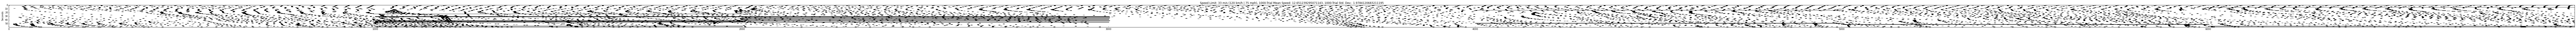

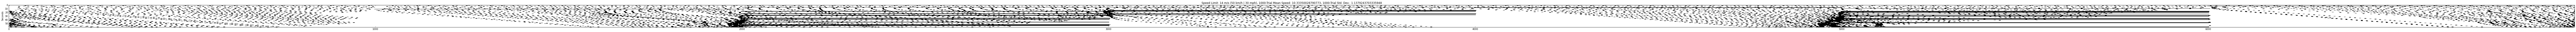

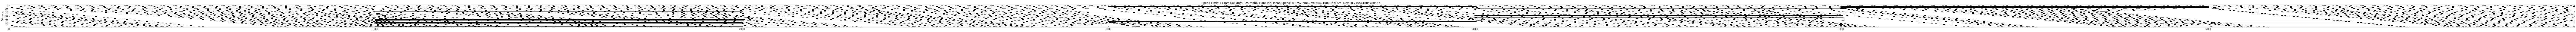

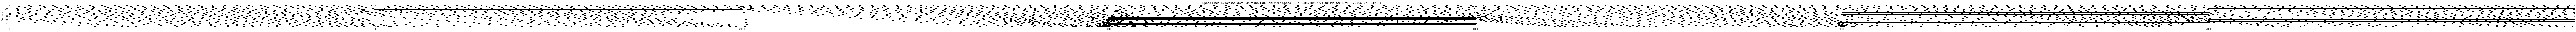

In [13]:
print('Graphs of Single Trial at Noted Speed\n(download to view at size)')
plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim1.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 33 m/s (120 km/h | 75 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_33_mean, highway_1000_33_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim2.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 14 m/s (50 km/h | 30 mph)')
plt.title('Speed Limit: 14 m/s (50 km/h | 30 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_14_mean, highway_1000_14_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim3.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 11 m/s (40 km/h | 25 mph)')
plt.title('Speed Limit: 11 m/s (40 km/h | 25 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_11_mean, highway_1000_11_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim4.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 15 m/s (54 km/h | 34 mph)')
plt.title('Speed Limit: 15 m/s (54 km/h | 34 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
          highway_1000_15_mean, highway_1000_15_std))
plt.ylabel('Seconds')
plt.show()

### Analysis of Single-Simulation Graphs at Different Speed Limits

In the graph of the speed limit 120 km/h | 75 mph, we see wave trends, indicating collection of traffic. Even with the "ideal" 40 km/h speed limit, there are terrible traffic backups in the curved sections.